Python 3.10.4
pip 22.3.1 from /Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine/ia_project_2_env/lib/python3.10/site-packages/pip (python 3.10)
/Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine
Using Python in /Users/drainasr-edine/github/ingenieur_ia/P2_drai_nasr-edine/ia_project_2_env:
[ OK ] Python is version 3.10.4 (main, Jul 17 2022, 13:52:49) [Clang 13.1.6 (clang-1316.0.21.2.5)]

[ OK ] jupyterlab
[ OK ] matplotlib
[ OK ] numpy
[ OK ] pandas
[ OK ] seaborn
[ OK ] statsmodels
[ OK ] folium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numer

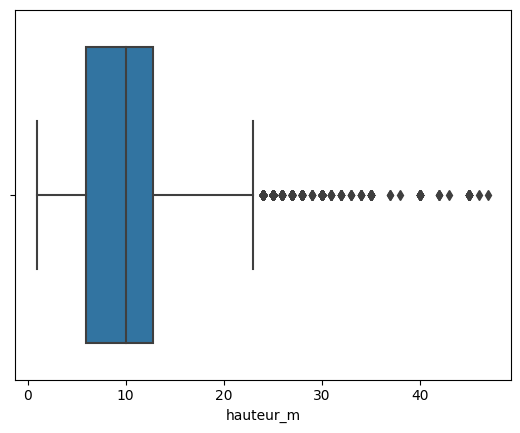

10.120300822881946 4.768587765782791 -4.185462474466428 24.426064120230322
Percentiles: 25th=6.000, 75th=12.812, IQR=6.812
Identified outliers: 2438


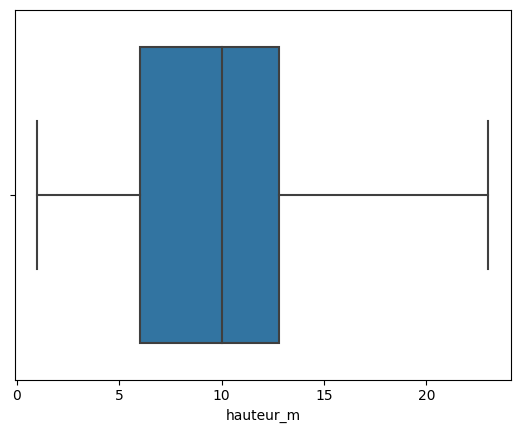

hauteur_m           0
circonference_cm    0
dtype: int64


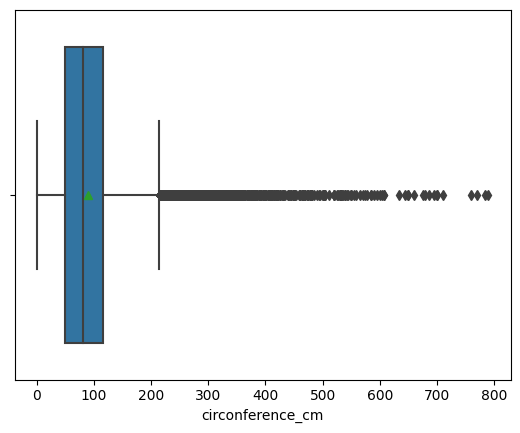

89.08666234328071 56.22193366513786 -79.57913865213287 257.75246333869427
Percentiles: 25th=49.000, 75th=115.000, IQR=66.000
Identified outliers: 5678


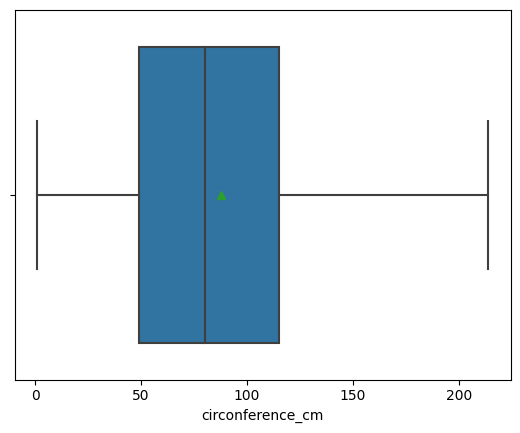

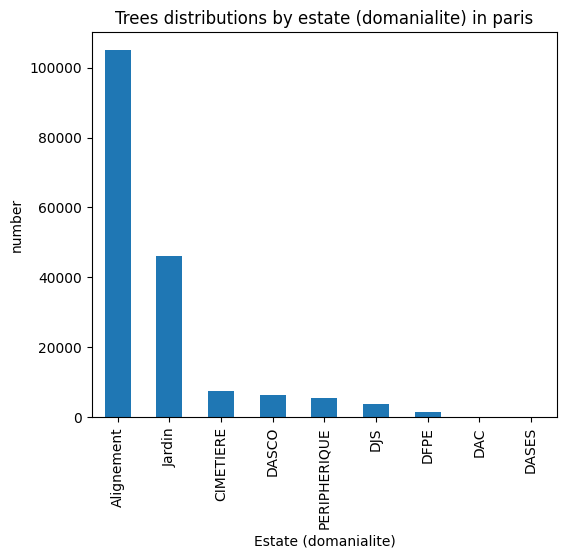

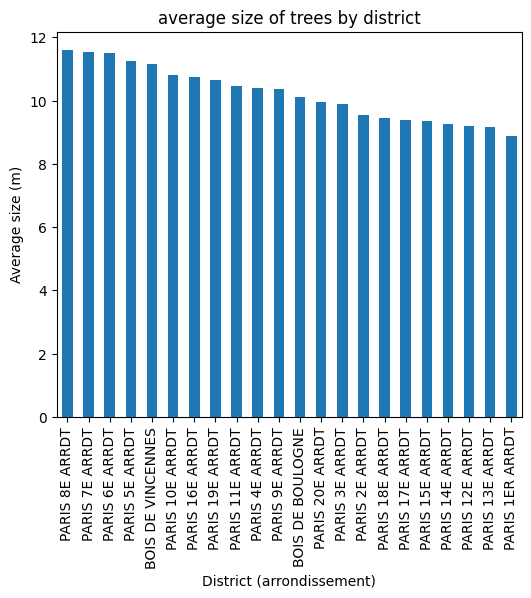

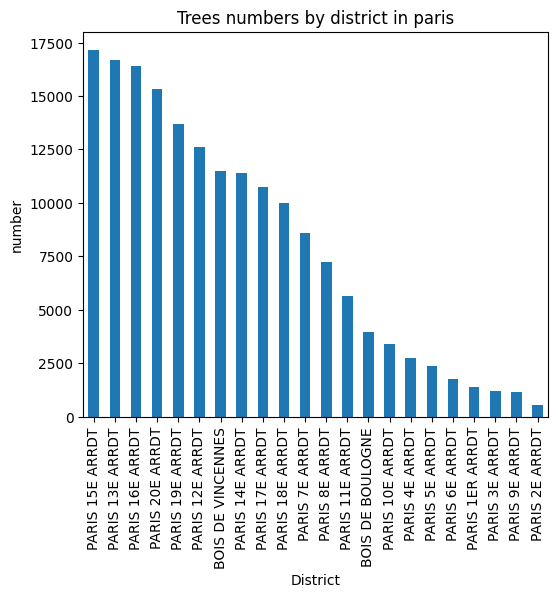

In [1]:
%run ./5_average_size_&_number_tree.ipynb

# Top 10: Trees most frequent in Paris

In [2]:
trees_most_frequent_in_paris = df.genre.value_counts().nlargest(10)
trees_most_frequent_in_paris

Platanus    39685
Aesculus    22717
Tilia       19281
Acer        13900
Sophora     11050
Prunus       6172
Pinus        4734
Fraxinus     4480
Quercus      3681
Celtis       3642
Name: genre, dtype: int64

<AxesSubplot: title={'center': 'Trees most frequent in paris'}, xlabel='Kind of Trees', ylabel='number'>

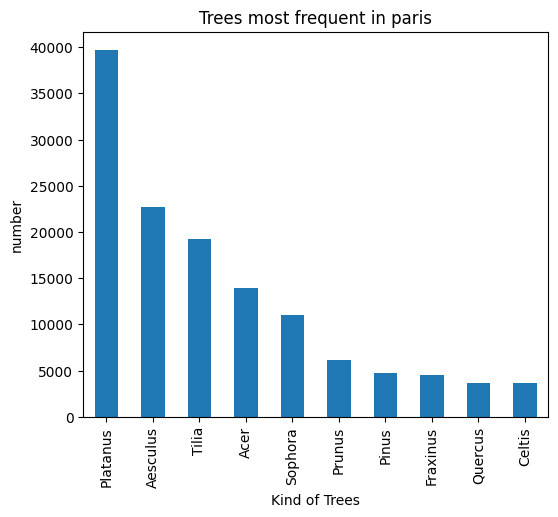

In [3]:
trees_most_frequent_in_paris.plot(kind='bar', title='Trees most frequent in paris', ylabel='number',
         xlabel='Kind of Trees', figsize=(6, 5))

# Trees the most frequent in Paris grouped by district

In [4]:
tree_most_present_by_dist = df.groupby(['arrondissement', 'genre'])['id'].count()
new_df=tree_most_present_by_dist.reset_index()
idx = new_df.groupby(['arrondissement'])['id'].transform(max) == new_df['id']
new_df = new_df[idx]
new_df.rename(columns = {'id':'number'}, inplace = True)
new_df["district_genre"] = '[' + new_df["arrondissement"] + ']' + ' - ' + new_df["genre"]
new_df

,arrondissement,genre,number,district_genre
1,BOIS DE BOULOGNE,Aesculus,1318,[BOIS DE BOULOGNE] - Aesculus
127,BOIS DE VINCENNES,Tilia,2024,[BOIS DE VINCENNES] - Tilia
179,PARIS 10E ARRDT,Platanus,1110,[PARIS 10E ARRDT] - Platanus
248,PARIS 11E ARRDT,Platanus,1682,[PARIS 11E ARRDT] - Platanus
327,PARIS 12E ARRDT,Platanus,3787,[PARIS 12E ARRDT] - Platanus
422,PARIS 13E ARRDT,Platanus,2468,[PARIS 13E ARRDT] - Platanus
521,PARIS 14E ARRDT,Platanus,2614,[PARIS 14E ARRDT] - Platanus
636,PARIS 15E ARRDT,Tilia,2202,[PARIS 15E ARRDT] - Tilia
727,PARIS 16E ARRDT,Platanus,4007,[PARIS 16E ARRDT] - Platanus
828,PARIS 17E ARRDT,Platanus,3113,[PARIS 17E ARRDT] - Platanus


<AxesSubplot: title={'center': 'Kind of Trees most present by district in paris'}, xlabel='District & genre', ylabel='number'>

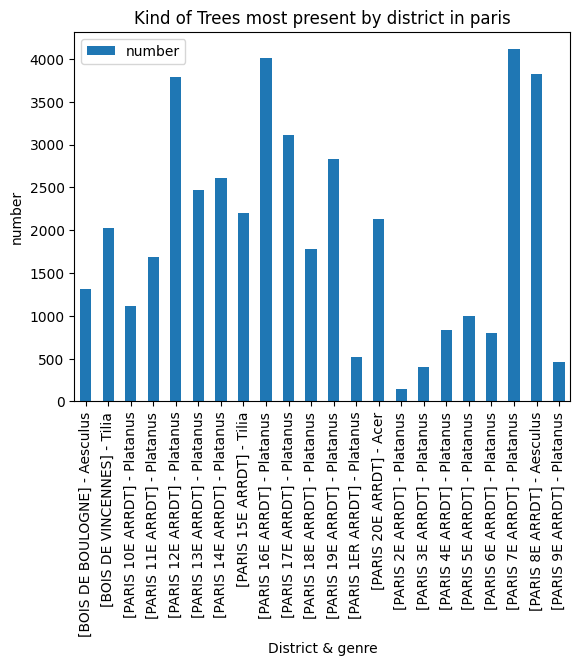

In [5]:
new_df.plot.bar(x='district_genre', y="number", title='Kind of Trees most present by district in paris', xlabel='District & genre', ylabel='number')